In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('model.csv')

In [2]:
#adjusting the columns' names
df.columns= df.columns.str.replace(' ', '')
df

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,0.136364,1.0,-0.180556,-0.250000,-125.000000,0.500000,0.500000,0.000000,0.500000,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0.100000,0.9,-0.318981,-1.000000,-0.050000,0.050000,-75.000000,0.450000,75.000000,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0.050000,0.5,-0.292708,-0.750000,-0.100000,0.000000,0.000000,0.500000,0.000000,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0.136364,0.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0.100000,1.0,-0.256481,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.455399,1.0,0.412429,43,3,11,0,...,0.200000,1.0,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000,7400
27996,428,8,206,0.647059,1.0,0.851240,5,3,0,1,...,0.100000,0.5,-0.622222,-1.000000,-0.166667,0.454545,0.136364,0.045455,0.136364,6100
27997,93,11,1083,0.535104,1.0,0.712627,32,27,11,1,...,0.100000,1.0,-0.404306,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200
27998,90,12,817,0.452229,1.0,0.585170,12,0,2,0,...,0.100000,0.7,-0.288889,-0.900000,-0.100000,0.000000,0.000000,0.500000,0.000000,1200


In [3]:
# check types of variables
df.dtypes

age_days                          int64
n_tokens_title                    int64
n_tokens_review                   int64
n_unique_tokens                 float64
n_non_stop_words                float64
n_non_stop_unique_tokens        float64
num_hrefs                         int64
num_self_hrefs                    int64
num_imgs                          int64
num_videos                        int64
average_token_length            float64
num_keywords                      int64
product_category                 object
self_reference_min_shares       float64
self_reference_max_shares       float64
self_reference_avg_sharess      float64
day                              object
topic_quality                   float64
topic_shipping                  float64
topic_packaging                 float64
topic_description               float64
topic_others                    float64
global_subjectivity             float64
global_sentiment_polarity       float64
global_rate_positive_words      float64


## Cleaning

### Eliminating correlated columns

In [4]:
#dropping these two variables, as they are obtainable from the others 
df.drop('topic_others', inplace=True, axis=1)
df.drop('rate_negative_words', inplace=True, axis=1)

### Solving errors

In [5]:
#adjusting the variables
cols = df.columns.tolist()
cols1000 = cols[21:36] 
for i in range(len(cols1000)):
    box=[cols1000[i]]
    df[box[0]] = df[box[0]].apply(lambda x: x/1000 if ((x>1)|(x<-1)) else x)

### check for null values

In [6]:
df.isnull().sum()

age_days                        0
n_tokens_title                  0
n_tokens_review                 0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
product_category                0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
day                             0
topic_quality                   0
topic_shipping                  0
topic_packaging                 0
topic_description               0
global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
avg_positive_polarity           0
min_positive_polarity           0
max_positive_polarity           0
avg_negative_p

<AxesSubplot:>

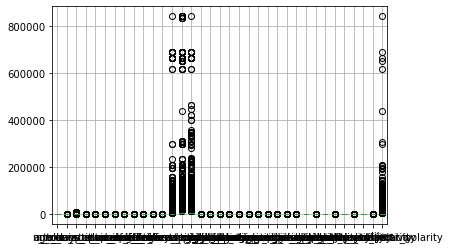

In [7]:
%matplotlib inline
df.boxplot()

### Split Numerical and Categorical

In [8]:
#selecting the categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical

,product_category,day
0,sport,tuesday
1,travel,monday
2,travel,thursday
3,travel,tuesday
4,tech,tuesday
...,...,...
27995,other,wednesday
27996,business,wednesday
27997,entertainment,tuesday
27998,travel,friday


In [9]:
#selecting the numerical variables
df_numerical=df.select_dtypes(include=[np.number])
df_numerical

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,0.136364,1.0,-0.180556,-0.250000,-0.125000,0.500000,0.500000,0.000000,0.500000,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0.100000,0.9,-0.318981,-1.000000,-0.050000,0.050000,-0.075000,0.450000,0.075000,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0.050000,0.5,-0.292708,-0.750000,-0.100000,0.000000,0.000000,0.500000,0.000000,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0.136364,0.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0.100000,1.0,-0.256481,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.455399,1.0,0.412429,43,3,11,0,...,0.200000,1.0,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000,7400
27996,428,8,206,0.647059,1.0,0.851240,5,3,0,1,...,0.100000,0.5,-0.622222,-1.000000,-0.166667,0.454545,0.136364,0.045455,0.136364,6100
27997,93,11,1083,0.535104,1.0,0.712627,32,27,11,1,...,0.100000,1.0,-0.404306,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200
27998,90,12,817,0.452229,1.0,0.585170,12,0,2,0,...,0.100000,0.7,-0.288889,-0.900000,-0.100000,0.000000,0.000000,0.500000,0.000000,1200


### Categorical

#### dummy creation

In [10]:
#for product category
dummy = pd.get_dummies(df['product_category']) 
df = pd.concat([df,dummy], axis = 1) 
df.drop('product_category', inplace=True, axis=1)
df.drop('other', inplace=True, axis=1) #i want to cut "other" among the dummies
dummy

,business,cleaning,entertainment,other,sport,tech,travel
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
27995,0,0,0,1,0,0,0
27996,1,0,0,0,0,0,0
27997,0,0,1,0,0,0,0
27998,0,0,0,0,0,0,1


In [11]:
#for day
dummy = pd.get_dummies(df['day'],drop_first=True) 
df = pd.concat([df,dummy], axis = 1) 
df.drop('day', inplace=True, axis=1)
dummy

#friday has been dropped

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
27995,0,0,0,0,0,1
27996,0,0,0,0,0,1
27997,0,0,0,0,1,0
27998,0,0,0,0,0,0


In [12]:
# changing the order, putting the target as the last column
cols = df.columns.tolist()
cols = cols[:34] + cols[35:] + [cols[34]]
df = df[cols] 
df

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,sport,tech,travel,monday,saturday,sunday,thursday,tuesday,wednesday,likes
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,1,0,0,0,0,0,0,1,0,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0,0,1,1,0,0,0,0,0,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0,0,1,0,0,0,1,0,0,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0,0,1,0,0,0,0,1,0,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0,1,0,0,0,0,0,1,0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.455399,1.0,0.412429,43,3,11,0,...,0,0,0,0,0,0,0,0,1,7400
27996,428,8,206,0.647059,1.0,0.851240,5,3,0,1,...,0,0,0,0,0,0,0,0,1,6100
27997,93,11,1083,0.535104,1.0,0.712627,32,27,11,1,...,0,0,0,0,0,0,0,1,0,1200
27998,90,12,817,0.452229,1.0,0.585170,12,0,2,0,...,0,0,1,0,0,0,0,0,0,1200


### Numerical

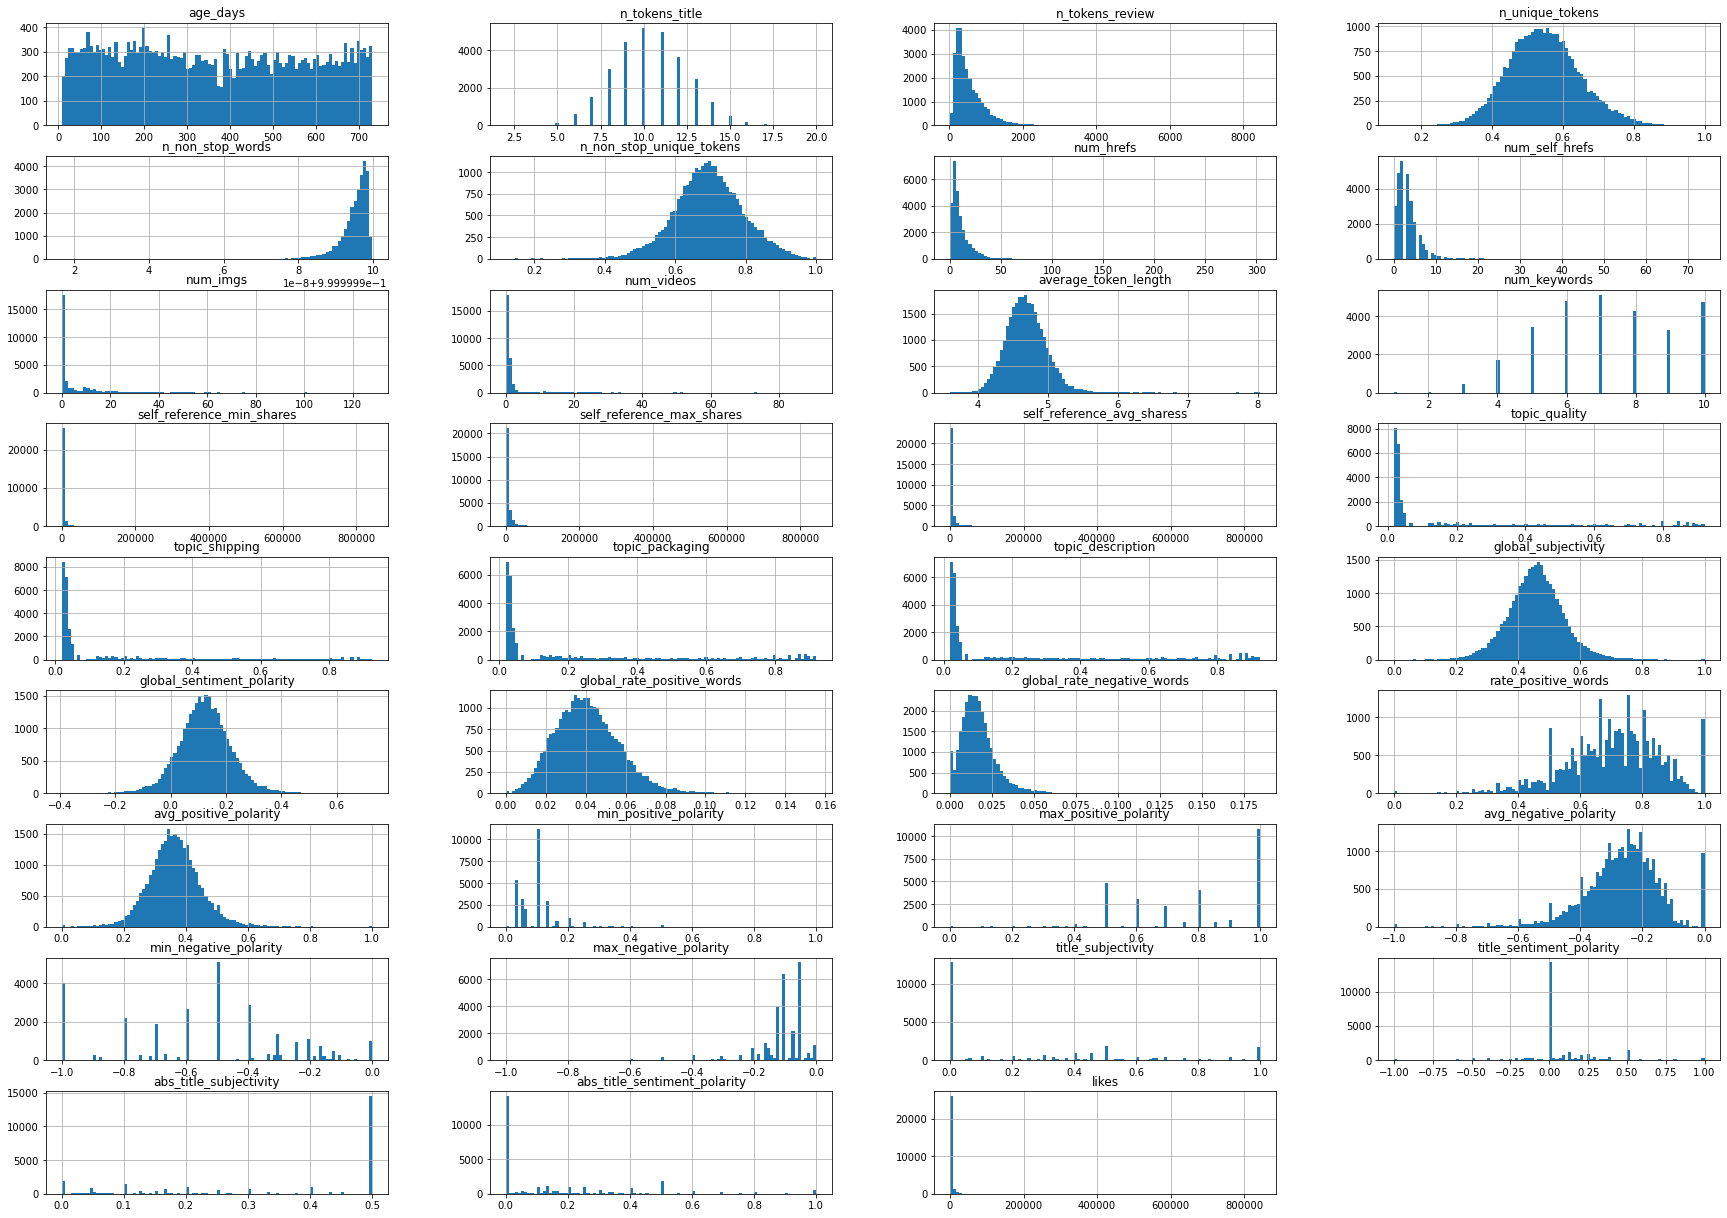

In [13]:
import matplotlib.pyplot as plt

df_hist=df_numerical.hist(layout=(10,4), figsize=(30,24), bins = 100)

### Pairplot

In [14]:
cols = df.columns.tolist()
cols_no_target_and_dummies=cols[:34] + [cols[46]]
df_0=df[cols_no_target_and_dummies]
df_0

,age_days,n_tokens_title,n_tokens_review,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,likes
0,436,9,532,0.462264,1.0,0.594427,7,7,1,0,...,0.136364,1.0,-0.180556,-0.250000,-0.125000,0.500000,0.500000,0.000000,0.500000,2200
1,185,16,1012,0.446247,1.0,0.638112,4,2,3,11,...,0.100000,0.9,-0.318981,-1.000000,-0.050000,0.050000,-0.075000,0.450000,0.075000,816
2,210,12,506,0.546559,1.0,0.693291,8,3,2,1,...,0.050000,0.5,-0.292708,-0.750000,-0.100000,0.000000,0.000000,0.500000,0.000000,1000
3,723,11,241,0.543933,1.0,0.648649,5,4,1,1,...,0.136364,0.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,660
4,345,11,983,0.405930,1.0,0.594747,11,7,1,1,...,0.100000,1.0,-0.256481,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,694,9,214,0.455399,1.0,0.412429,43,3,11,0,...,0.200000,1.0,-0.333333,-0.333333,-0.333333,0.000000,0.000000,0.500000,0.000000,7400
27996,428,8,206,0.647059,1.0,0.851240,5,3,0,1,...,0.100000,0.5,-0.622222,-1.000000,-0.166667,0.454545,0.136364,0.045455,0.136364,6100
27997,93,11,1083,0.535104,1.0,0.712627,32,27,11,1,...,0.100000,1.0,-0.404306,-1.000000,-0.050000,0.000000,0.000000,0.500000,0.000000,1200
27998,90,12,817,0.452229,1.0,0.585170,12,0,2,0,...,0.100000,0.7,-0.288889,-0.900000,-0.100000,0.000000,0.000000,0.500000,0.000000,1200


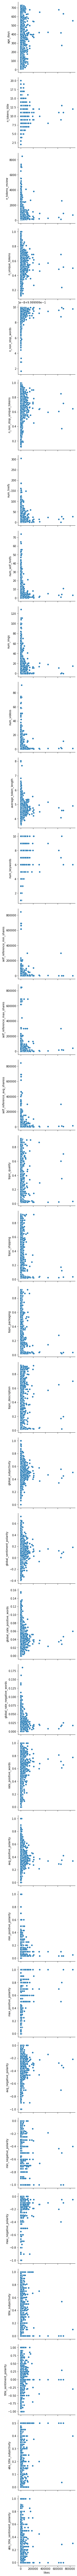

In [15]:
cols = df_0.columns.tolist()
sns.pairplot(df_0, x_vars=['likes'], y_vars=cols[:-1], height = 4)

## Data Standardization and Scaling

### Box Cox

In [16]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

# we transform only the ones reported below: every variables except for days_age, four topics and the dummies 

cols = df.columns.tolist()
cols = cols[1:15] + cols[19:34] + [cols[46]]

lamb=np.zeros(len(cols), float)

In [17]:
for i in range(len(cols)):
    box=[cols[i]]
    print(i)
    if df[box[0]].min()>0 :
        df_box=stats.boxcox(df[box[0]]) 
        lamb[i] = df_box[1] #saving lambda
        df[box]=df_box[0]
        print(df_box[1])
    else : #translation for the negative variables because box cox doen't accept them
        df_box=stats.boxcox(df[box[0]] - df[box[0]].min() + 0.000000000000001) 
        df[box]=df_box[0]
        lamb[i] = df_box[1] #saving lambda
        print(df_box[1])

#saving target's lambda         
lambd = lamb[-1]        

0
0.7296522588611678
1
-0.02283333191333568
2
0.79374443826031
3
169612535.18209964
4
1.583510980301239
5
0.2241191846510271
6
0.20461494689807072
7
0.1369133222608432
8
-0.050745121025180556
9
-1.0540190450097378
10
1.1032603885781405
11
0.1250517517707015
12
0.12084279310953097
13
0.1252449731503424
14
0.8682807569089952
15
1.0683664864417601
16
0.5535872718595624
17
0.3746468533264398
18
1.3284308816747505
19
0.7460554896877103
20
0.23025318160924432
21
1.2526297172378817
22
1.3715620021715762
23
0.19199058992619938
24
3.954385801809318
25
0.015553365352541615
26
0.743332801810987
27
0.29427382877001623
28
-0.0021231485142995336
29
-0.23727867677974848


<AxesSubplot:>

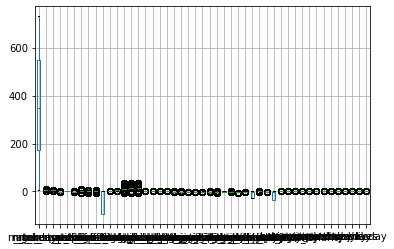

In [18]:
df.boxplot()

### Standardization

In [19]:
names=df.columns

cols = df.columns.tolist()
cols = cols[0:34] #target is done separately 

<AxesSubplot:>

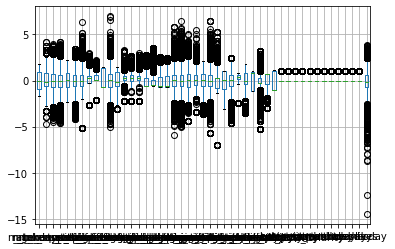

In [20]:
from sklearn.preprocessing import StandardScaler

#scaling all variables except dummies and target
scaler = StandardScaler().fit(df[cols])
df[cols]= scaler.transform(df[cols])

#scaling target
scaler_target = StandardScaler().fit(df[["likes"]])
df[["likes"]]= scaler_target.transform(df[["likes"]])

df=pd.DataFrame(df)
df.columns = names
df.boxplot()

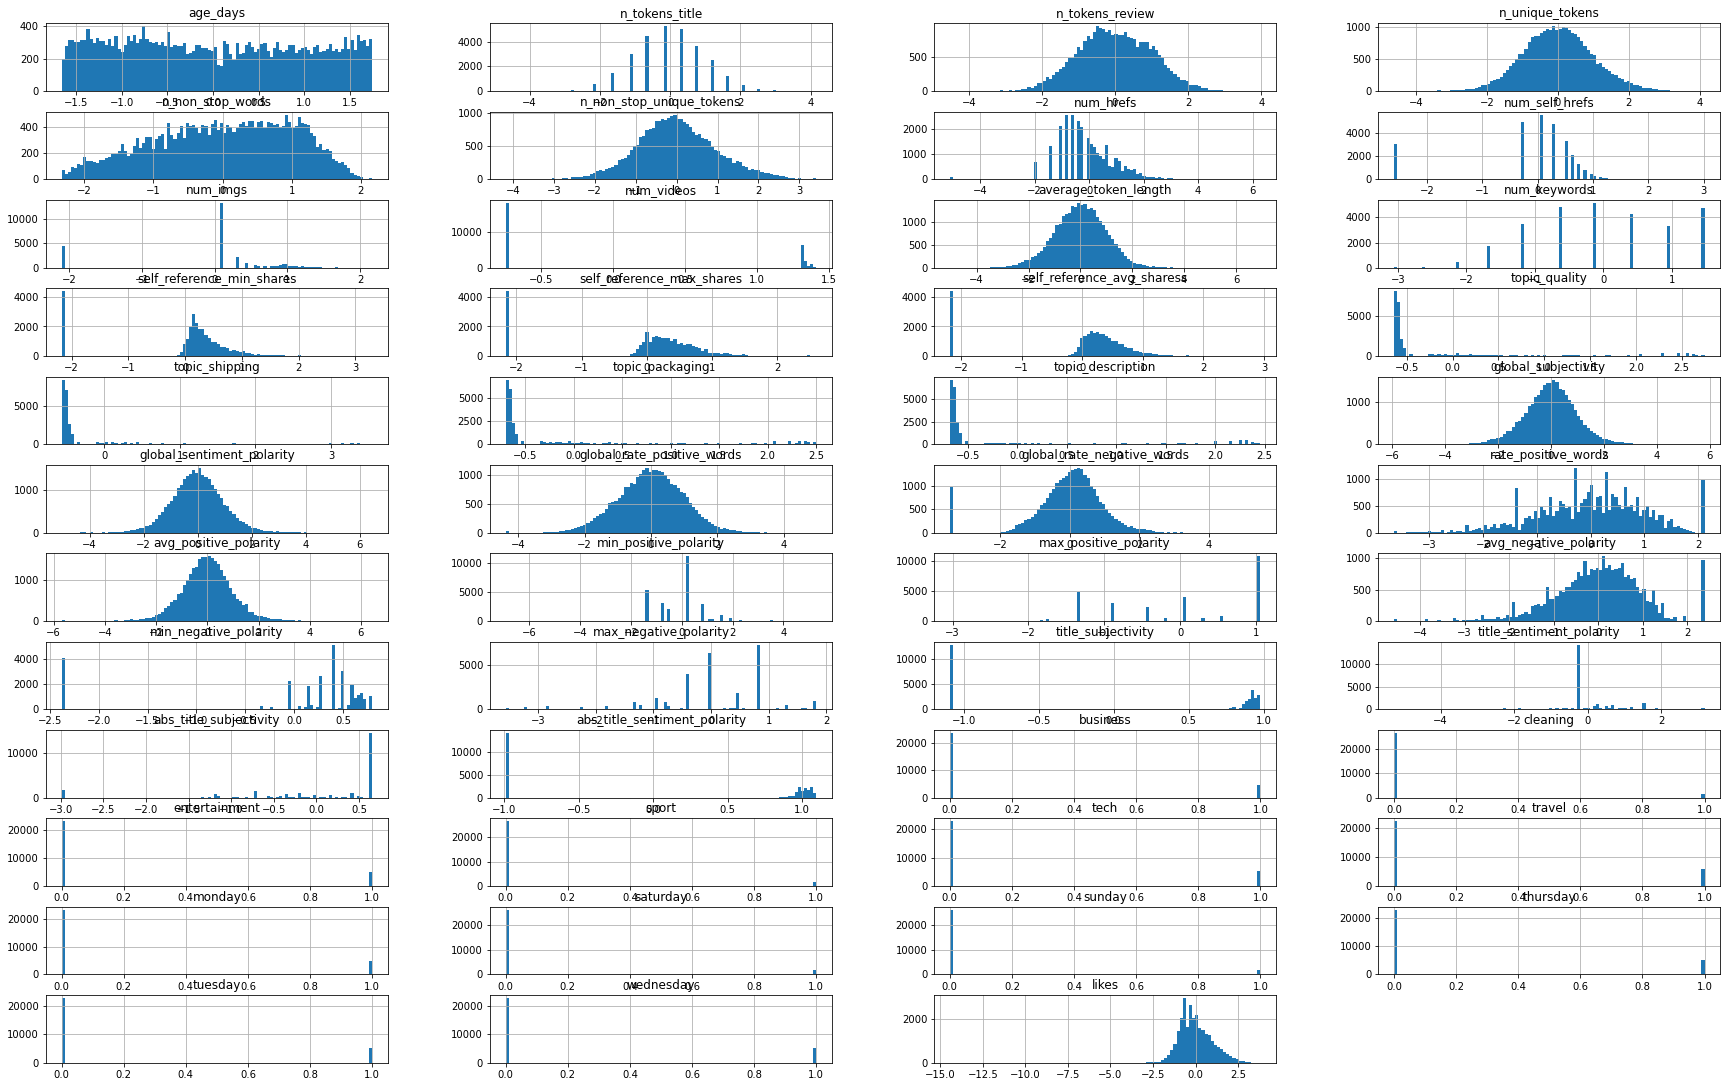

In [21]:
df_numerical=df.select_dtypes(include=[np.number])
df_hist=df_numerical.hist(layout=(15,4), figsize=(30,24), bins = 100)

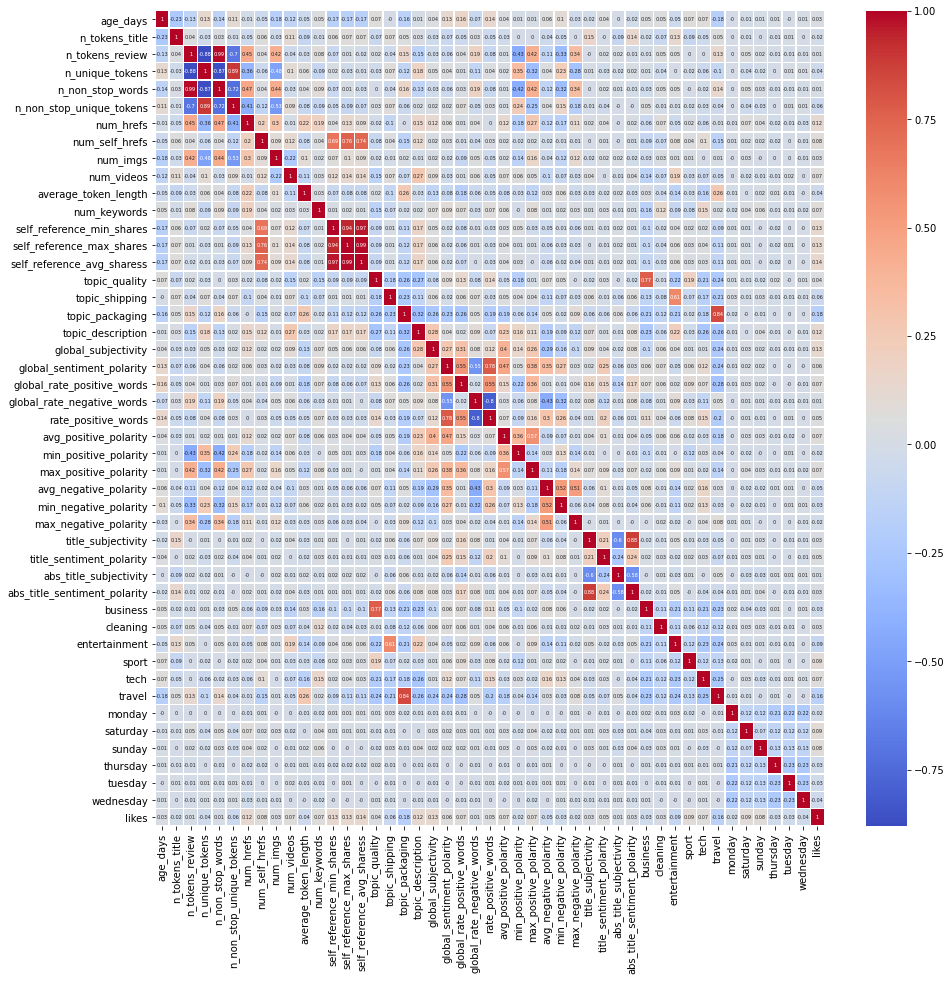

In [22]:
# heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (15,15))
sns.heatmap(data=df.corr().round(2), cmap='coolwarm', linewidths=.5, annot=True, annot_kws={"size":5})
plt.show()

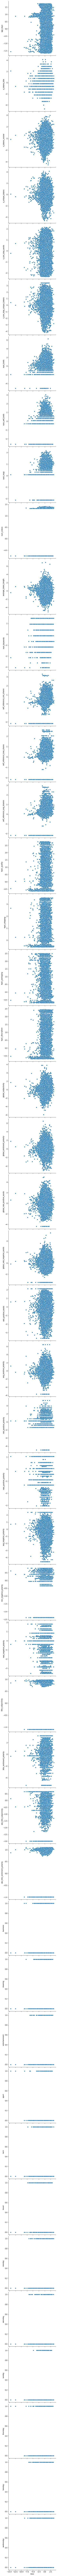

In [23]:
# pairplot
cols = df.columns.tolist()
sns.pairplot(df, x_vars=['likes'], y_vars=cols[:-1], height = 5)

## Multicollinearity - VIF Calculation

In [24]:
cols = df.columns.tolist()
cols_no_target=cols[:-1]
df_1=df[cols_no_target]
df_1

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_1.values, i)
                          for i in range(len(df_1.columns))]
  
print(vif_data)

                         feature         VIF
0                       age_days    1.235399
1                 n_tokens_title    1.133875
2                n_tokens_review   60.832318
3                n_unique_tokens   21.521373
4               n_non_stop_words   48.380980
5       n_non_stop_unique_tokens   10.106458
6                      num_hrefs    1.829444
7                 num_self_hrefs    2.939086
8                       num_imgs    1.576026
9                     num_videos    1.252045
10          average_token_length    1.544329
11                  num_keywords    1.144466
12     self_reference_min_shares   48.309273
13     self_reference_max_shares  242.741297
14    self_reference_avg_sharess  434.594918
15                 topic_quality    4.327652
16                topic_shipping    3.269832
17               topic_packaging    4.917485
18             topic_description    4.082794
19           global_subjectivity    1.594354
20     global_sentiment_polarity    6.366345
21    glob

## Models

### Separating target

In [25]:
cols = df.columns.tolist()
colsx = cols[:-1]
colsy = cols[-1]
X = df[colsx]
y = df[colsy]

### Splitting training and test

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model Selection

In [49]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import metrics
estimators = [("knn", KNeighborsRegressor(algorithm='auto', n_neighbors=40, p=1, weights='distance', n_jobs=-1)),
              ("forest", RandomForestRegressor(criterion='mse', max_depth=5, min_samples_leaf=30, n_estimators=200)),
              ("svr", SVR(C=0.5, epsilon=0.5, gamma='auto', kernel='rbf'))
              ]
              
final_estimator = LinearRegression(fit_intercept=True, n_jobs=-1) 

reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=3, n_jobs=-1)
reg.fit(X_train, y_train)
              
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test) 
       
y_train1 = scaler_target.inverse_transform(y_train)
y_test1 =scaler_target.inverse_transform(y_test)

y_train_exp= pd.DataFrame(y_train1).apply(lambda x: (((x*lambd)+1)**(1/lambd))) #inverse boxcox
y_test_exp= pd.DataFrame(y_test1).apply(lambda x: (((x*lambd)+1)**(1/lambd))) #inverse boxcox

y_pred_train1 = scaler_target.inverse_transform(y_pred_train)
y_pred_test1 = scaler_target.inverse_transform(y_pred_test)   

y_pred_train_exp=pd.DataFrame(y_pred_train1).apply(lambda x: (((x*lambd)+1)**(1/lambd))) #inverse boxcox
y_pred_test_exp=pd.DataFrame(y_pred_test1).apply(lambda x: (((x*lambd)+1)**(1/lambd))) #inverse boxcox

    
print()
print("MAE  train %.3f (%f)  test %.3f (%f)" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_train_exp, y_pred_train_exp) ,metrics.mean_absolute_error(y_test, y_pred_test),  metrics.mean_absolute_error(y_test_exp, y_pred_test_exp)  ) )
print("MSE  train %.3f              test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
print("RMSE train %.3f              test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
print("r2   train %.3f              test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )



MAE  train 0.535 (2138.055978)  test 0.686 (2292.436280)
MSE  train 0.519              test 0.823
RMSE train 0.720              test 0.907
r2   train 0.482              test 0.170


In [36]:
y_pred=reg.predict(X)
y_pred_A = scaler_target.inverse_transform(y_pred)
y_pred_B=pd.DataFrame(y_pred_A).apply(lambda x: (((x*lambd)+1)**(1/lambd)))

y_A = scaler_target.inverse_transform(y)
y_B=pd.DataFrame(y_A).apply(lambda x: (((x*lambd)+1)**(1/lambd)))

error=y-y_pred

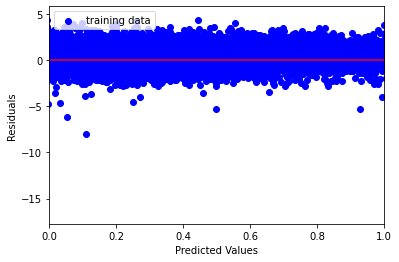

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(y_pred,error, c="b", label="training data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=0, xmax=8, color="r")
plt.xlim([0,1])
plt.show()

In [38]:
print(error.mean())
print(error.std())

-0.00884045801145727
0.7418276563353404


In [42]:
nb_error = np.array(error).flatten()

error = np.array(error).reshape(-1,1)
scaled_error= StandardScaler(copy=False).fit(error).transform(error).flatten()

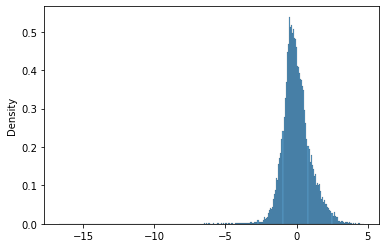

In [44]:
import numpy as np
import scipy 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from matplotlib import pyplot as plt
import seaborn as sns


# We test a exponential distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(nb_error)

err_mean=param[-2]
err_std=param[-1]

# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
test_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(nb_error))


# plot the distribution and compare with a normal

ax = sns.histplot(nb_error, stat='density')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = scipy.stats.norm.pdf(x_pdf, loc=err_mean, scale=err_std)

#ax.plot(x_pdf, y_pdf, 'r', lw=2, label='normal')                                                   
#ax.legend() 

#plt.hist(nb_error_train,alpha=.3, density=True,bins='auto')
#plt.hist(test_dist,alpha=.3, density=True,bins='auto')
#plt.show()

In [47]:
scipy.stats.shapiro(error)

ShapiroResult(statistic=0.9478231072425842, pvalue=0.0)